In [ ]:
# 제3절 분산분석(ANOVA) 304P
# T-검정이 두 집단간의 평균 차이를 비교하는 통계분석 방법이라면 
# 분산분석은 두개이상의 다수 집단간 평균을 비교하는 방법니다.
# 종속변수는 연속형이어야 하며, 독립변수는 범주형 변수여야 한다.

In [3]:
# 3.일원배치 분산분석
# - 개념
#  . 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용되는 검증 방법
#  . 모집단의 수에는 제한이 없으며 각 표본의 수는 같지 않아도 된다.
#  . F 검정 통계량을 이용한다.
# - 가정
#  . 집단의 측정치는 서로 독립적이며 정규분포를 따른다.
#  . 집단 측정치의 분산은 같다.(등분산 가정)
# - 가설
#  . 귀무가설(H0) : k개의 집단 간 모평균에는 차이가 없다. 즉, 같다고 할 수 있다.
#  . 대립가설(H0) : k개의 집단 간 모평균이 모두 같다고 할 수 없다.
# - 사후검정
#  사후검정이란 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을 경우, 어떤 집단들에 대해서 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석이다.
#  사후분석의 종류로는 던칸의 MRT, vltudml LSD, 튜키의 HSD 방법 등이 있다.

In [ ]:
# - 단계
#  . 가설 수립 > 정규성 검정 > 등분산 검정 > f-oneway 검정 > 사후검정

In [5]:
import scipy.stats as stats  
import pandas as pd
Iris_data = pd.read_csv("C:/Users/A202112006/Desktop/py/data/iris.csv")
Iris_data.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
Iris_data["target"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
Iris_data.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [8]:
target_list = Iris_data["target"].unique()
setosa = Iris_data[Iris_data["target"]==target_list[0]]["sepal width"]
versicolor = Iris_data[Iris_data["target"]==target_list[1]]["sepal width"]
virginica = Iris_data[Iris_data["target"]==target_list[2]]["sepal width"]
print(target_list)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


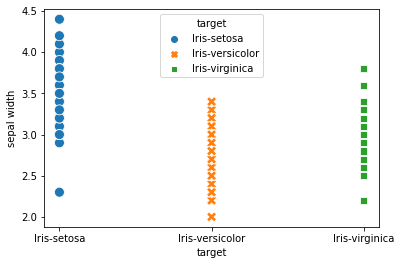

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot by Groups
sns.scatterplot(x='target', 
                y='sepal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=Iris_data)
plt.show()


In [13]:
## 3.1 정규성 검정
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))
# * 귀무가설 : 정규분포를 따른다.
# * 대립가설 : 정규분포를 따른다고 보기 어렵다.
# * p-value가 0으로 유의수준 5%보다 크기 때문에 대립가설을 기각하고 귀무가설 채택. 즉, 정규성을 만족함.

ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)
ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


In [14]:
# 3.2 등분산성 검증
stats.levene(setosa, versicolor, virginica)
# * 귀무가설 : 집단간 분산이 같다.
# * 대립가설 : 집단간 분산이 다르다.
# * p-value가 0으로 유의수준 5%보다 크기 때문에 대립가설을 기각하고 귀무가설 채택. 즉, 집단간 분산이 같음.

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064539)

In [16]:
# 3.3 ANOVA 검증
stats.f_oneway(setosa,versicolor,virginica)
# * 귀무가설 : 집단간 평균이 같다.
# * 대립가설 : 집단간 평균이 다르다.
# * p-value가 0으로 유의수준 5%보다 작기 때문에 귀무가설을 기각하고 대립가설 채택. 즉, 집단간 평균이 다름.

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

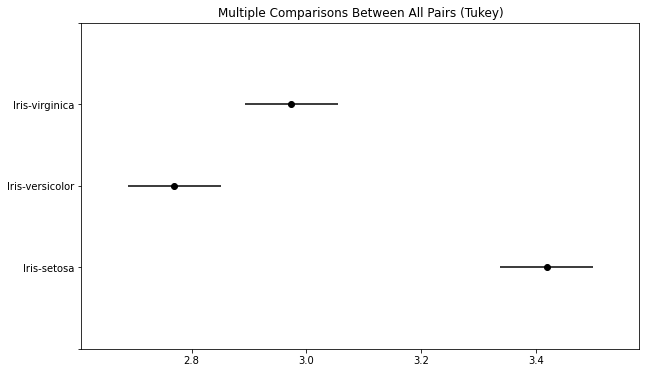

In [17]:
# 3.4 사후 검증
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data= Iris_data["sepal width"], groups=Iris_data["target"] )
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [18]:
tuekeyhsd.summary()
# p-adj가 모두 0.05보다 작으므로 각각의 비교에 대한 귀무가설을 모두 기각
# 즉, 모든 종들에 대해서 꽃받침 폭의 평균값은 통계적으로 유의한 차이가 있다는것을 알 수 있음

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [21]:
# 기타1. 정규성을 만족하지 못할경우
# kruskal 검정 진행
stats.kruskal(setosa,versicolor,virginica)
# p-value 0.05보다 작으므로 세 집단의 모평균이 "모두" 동일한 것은 아니다. 

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [25]:
# 기타2. 등분산성을 만족하지 못할경우
# pingouin 검정 진행
# !pip install pingouin 
import pingouin as pg
pg.welch_anova(data = Iris_data, dv ='sepal width', between='target')

# 귀무가설: H0 = 세 집단의 모평균은 "모두" 동일하다.
# 대립가설: H1 = 세 집단의 모평균이 "모두" 동일한 것은 아니다.
# p-value 0.05보다 작으므로 대립가설을 채택하고, 세 집단의 모평균이 "모두" 동일한 것은 아니다. 

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [ ]:
## 4.이원배치 분산분석
# 교호작용 검정, 주효과 검정1/2

In [27]:
# 데이터 불러오기
import pandas as pd
mtcars = pd.read_csv('C:/Users/A202112006/Desktop/py/data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [28]:
## cyl, am, mpg 변수들로만 구성된 분석용 데이터셋 생성 
mtcars = mtcars[["mpg","am","cyl"]]
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [29]:
## 분산분석 수행 
# H0 : 상호작용이 없다.
# H1 : 상호작용이 있다.
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

# C(cyl):C(am) 교호작용 0.2686으로 0.05보다 크므로 귀무가설을 기각하지 않는다.
# 즉 교호작용에 상호작용은 없음. 교호작용이 존재하지 않을때, 아래와 같은 주효과 검정이 의미를 갖는다.

# C(cyl) : p-value는 0.05보다 작으므로 주효과 검정에서 귀무가설을 기각한다.
# 따러서 실린더 개수에 따라 주행거리 간 유의미한 차이는 존재한다고 해석할 수 있음

# C(am) : p-value는 0.05보다 작으므로 주효과 검정에서 귀무가설을 기각한다.
# 따러서 변속기 종류에 따라 주행거리 간 유의미한 차이는 존재한다고 해석할 수 있음

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


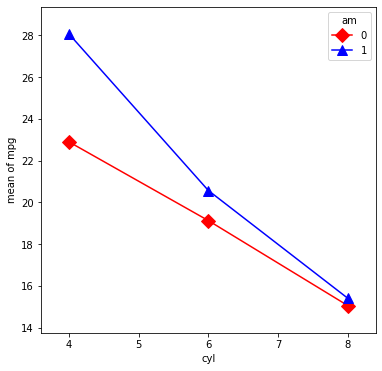

In [30]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

## 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
cyl = mtcars["cyl"]
am = mtcars["am"]
mpg = mtcars["mpg"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl,am, mpg,
                       colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)
